In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ML - model from sklearn

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()

In [116]:
# in order to compare you model performace during testing
from sklearn.metrics import r2_score


In [117]:
from sklearn.metrics import mean_squared_error


In [118]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA
Performed EDA and cleaned the data

In [119]:
# cleaning I need to see assumption in data

In [120]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [121]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [122]:
Y = df[["charges"]]
num_col = df[["age","bmi","children"]]
cat = df[["sex","smoker","region"]]

<Axes: xlabel='bmi', ylabel='charges'>

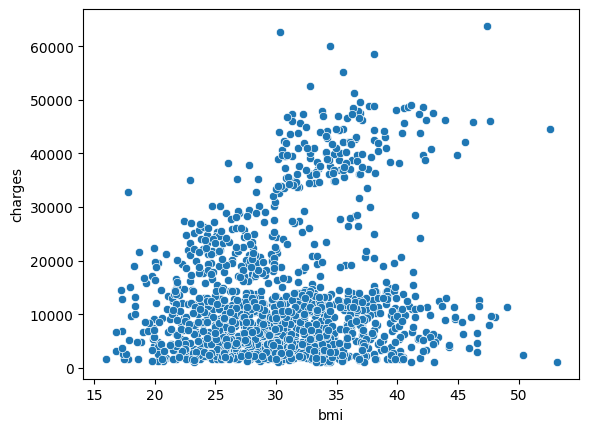

In [123]:
sns.scatterplot(df, x = "bmi", y="charges")

In [124]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [126]:
for i in ["sex","smoker","region"]:
    df[i] = le.fit_transform(df[i])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: ylabel='age'>

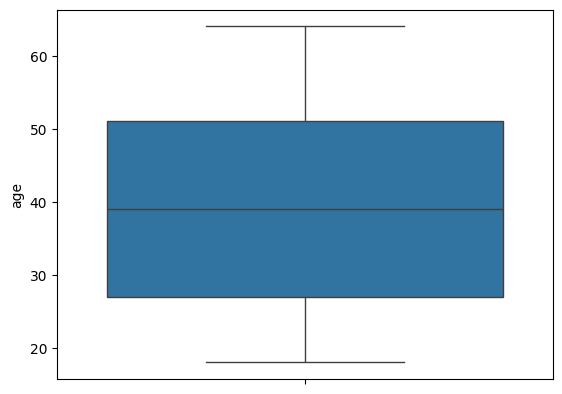

In [127]:
# outlier in numerical
sns.boxplot(df.age)

# Outlier treatment


<Axes: ylabel='bmi'>

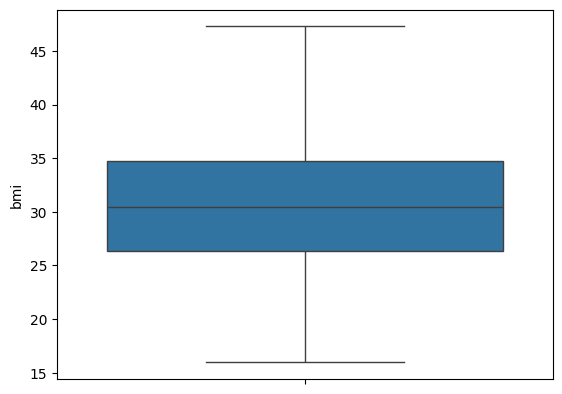

In [128]:
df.describe()
IQR = 34.69-26.29
UC = 34.69 + (1.5*IQR)
df["bmi"] = np.where(df["bmi"]>UC,UC,df["bmi"])
sns.boxplot(df.bmi)

In [129]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [130]:
# multicollinearity - VIF
# IF VIF > 10 Gerneally it said that if any independent col (VIF) > 10 it mean it has multicollinearity

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

multi = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = multi.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(multi.values, i)
						for i in range(len(multi.columns))]

print(vif_data)


    feature        VIF
0       age   7.585050
1       sex   2.000513
2       bmi  10.427230
3  children   1.801801
4    smoker   1.256829
5    region   2.925639


In [132]:
new = df[['age', 'sex', 'children', 'smoker', 'region',"charges"]]
new.head()

,age,sex,children,smoker,region,charges
0,19,0,0,1,3,16884.92400
1,18,1,1,0,2,1725.55230
2,28,1,3,0,2,4449.46200
3,33,1,0,0,1,21984.47061
4,32,1,0,0,1,3866.85520


In [133]:
# correlation also
new.corr()

,age,sex,children,smoker,region,charges
age,1.000000,-0.020856,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.017163,0.076185,0.004588,0.057292
children,0.042469,0.017163,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.067998,0.787251,-0.006208,1.000000


In [134]:
new.isnull().sum()

age         0
sex         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [135]:
# so now I need to select my best feature
import statsmodels

In [136]:
print(dir(statsmodels))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__init__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '__version_info__', '__version_tuple__', '_version', 'api', 'base', 'compat', 'datasets', 'debug_warnings', 'discrete', 'distributions', 'duration', 'emplike', 'formula', 'gam', 'genmod', 'graphics', 'imputation', 'iolib', 'monkey_patch_cat_dtype', 'multivariate', 'nonparametric', 'regression', 'robust', 'sandbox', 'stats', 'test', 'tools', 'tsa']


In [137]:
from statsmodels import formula
print(dir(formula))

['PytestTester', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api', 'formulatools', 'handle_formula_data', 'test']


In [138]:
# forward and backward elmination technique
import statsmodels.api as smf

In [139]:
Y = new[["charges"]]
X = new[['age', 'sex', 'children', 'smoker', 'region']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1827.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:05:49   Log-Likelihood:                         -13627.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1333   BIC:                                  2.729e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          229.2022      7.753     29.562      0.000     213.992     244.412
sex         -385.5373    337.796     -1.141      0.254   -1048.207     277.133
children     350.1996    142.626      2.455      0.014      70.403     629.996
smoker      2.356e+04    432.213     54.519      0.000    2.27e+04    2.44e+04
region      -335.7619    147.038     -2.283      0.023    -624.214     -47.310
==============================================================================
Omnibus:                      265.770   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.315
Skew:                           1.084   Prob(JB):                    2.70e-136
Kurtosis:                       5.549   Cond. No.                         104.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
Y = new[["charges"]]
X = new[['age', 'children', 'smoker', 'region']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              2282.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:05:49   Log-Likelihood:                         -13628.
No. Observations:                1338   AIC:                                  2.726e+04
Df Residuals:                    1334   BIC:                                  2.728e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          226.1716      7.285     31.045      0.000     211.880     240.463
children     336.8143    142.159      2.369      0.018      57.934     615.695
smoker       2.35e+04    429.064     54.780      0.000    2.27e+04    2.43e+04
region      -357.0787    145.864     -2.448      0.014    -643.226     -70.931
==============================================================================
Omnibus:                      267.709   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.332
Skew:                           1.091   Prob(JB):                    2.20e-137
Kurtosis:                       5.554   Cond. No.                         102.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
Y = new[["charges"]]
X = new[['age','smoker']]
model = smf.OLS (Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              4531.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:05:49   Log-Likelihood:                         -13633.
No. Observations:                1338   AIC:                                  2.727e+04
Df Residuals:                    1336   BIC:                                  2.728e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          222.5144      4.657     47.781      0.000     213.379     231.650
smoker      2.348e+04    428.588     54.785      0.000    2.26e+04    2.43e+04
==============================================================================
Omnibus:                      271.407   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.573
Skew:                           1.111   Prob(JB):                    1.95e-137
Kurtosis:                       5.521   Cond. No.                         101.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
# now these are perfect or best feature to predict new charges
Y = new[["charges"]]
X = new[['age', 'children', 'smoker', 'region']]

In [143]:
validationset = new.sample(n=150)
validationset.shape

(150, 6)

In [144]:
new.shape
# row - 1338
print(1338*0.25)

334.5


In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1003, 4) (1003, 1)
(335, 4) (335, 1)


In [146]:
# normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_noraml = mms.fit_transform(x_train)
X_train_noraml

array([[0.45652174, 0.        , 0.        , 1.        ],
       [0.15217391, 0.2       , 0.        , 0.66666667],
       [0.65217391, 0.6       , 1.        , 0.66666667],
       ...,
       [0.19565217, 0.        , 0.        , 0.66666667],
       [0.84782609, 0.        , 0.        , 1.        ],
       [0.02173913, 0.        , 0.        , 1.        ]])

In [147]:
X_tets_nrml = mms.transform(x_test)
X_tets_nrml

array([[0.39130435, 0.        , 1.        , 0.66666667],
       [0.60869565, 0.2       , 0.        , 0.66666667],
       [0.02173913, 0.        , 0.        , 1.        ],
       ...,
       [0.95652174, 0.2       , 0.        , 0.66666667],
       [0.13043478, 0.        , 0.        , 0.33333333],
       [0.02173913, 0.        , 1.        , 0.33333333]])

In [148]:
model = LinearRegression()

In [149]:
model.fit(X_train_noraml,y_train)

LinearRegression()

In [150]:
model.score(X_train_noraml,y_train)

0.7251489470005283

In [151]:
# prediction
pred = model.predict(X_tets_nrml)
res = pd.DataFrame()
res = pd.concat([x_test,res],axis=1)
res["Actual_charges"] = y_test
res["pred_charges"] = pred
res

,age,children,smoker,region,Actual_charges,pred_charges
53,36,0,1,2,37742.57570,31024.932433
6,46,1,0,2,8240.58960,10192.035952
681,19,0,0,3,1242.26000,1941.371889
979,36,0,0,2,4889.03680,6901.319365
1005,29,2,0,1,4433.38770,6214.775444
...,...,...,...,...,...,...
45,55,0,0,3,20630.28351,11946.037446
707,49,3,0,1,10264.44210,12284.565797
379,62,1,0,2,27000.98473,14638.553977
174,24,0,0,1,2855.43755,3801.952921


In [152]:
print(r2_score(res["Actual_charges"], res["pred_charges"]))

0.7159529503518247


In [153]:
res["error"] = res["Actual_charges"] - res["pred_charges"]
res.head(2)

,age,children,smoker,region,Actual_charges,pred_charges,error
53,36,0,1,2,37742.5757,31024.932433,6717.643267
6,46,1,0,2,8240.5896,10192.035952,-1951.446352


In [154]:
res["error"].mean()

-545.3310141535422

<ipython-input-155-197198b16522>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res["error"])


<Axes: xlabel='error', ylabel='Density'>

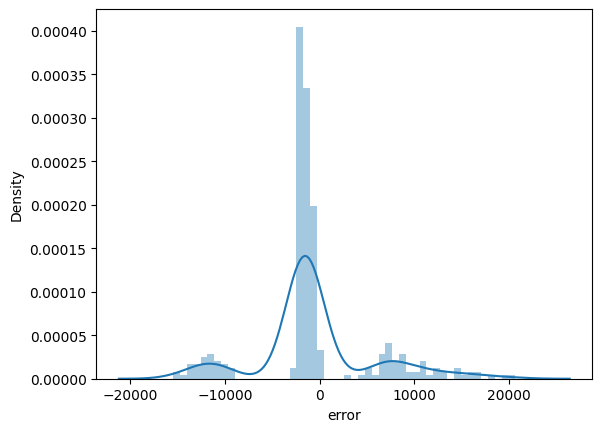

In [155]:
sns.distplot(res["error"])

In [156]:
Y = validationset[["charges"]]
X = validationset[['age', 'children', 'smoker', 'region']]
val_x = mms.transform(X)
pre_val = model.predict(val_x)
print(r2_score(Y, pre_val))

0.7806930829791525


# prediction accuracy
Here prediction accuracy is good so we can go with the model for prediction